In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (80,20)
import os
from os import listdir
from os.path import isfile, join
from bfseg.utils.image_enhancement import reduce_superpixel,plot_reduced_sp,to_rgb_mask,get_preview_image,convert_file_path_to_gt

In [2]:
## Main Program

from os import listdir
import os
from os.path import isfile, join

working_dir = "/home/rene/cla_dataset/cam0/"
output_dir = "/home/rene/cla_dataset/cam0_preprocessed"

# Copy all images int this list
image_folders = [f for f in listdir(working_dir)  if ".txt" not in f]

# Sort by timestamp as they will be remapped to img_001, img_002,...
image_folders = sorted(image_folders, key=float, reverse = False)

# Projected pointcloud 
files_labels = [ f + "/labels.png" for f in image_folders]
# Projected pointcloud on top of original image
files_preview = [ f + "/preview.png" for f in image_folders]
# Distance from camera for each projected pointcloud. 
files_distance = [f + "/distance.png" for f in image_folders]
# original input image
files_original = [f + "/original.png" for f in image_folders]


In [ ]:
# Extracts mapping from previous image name (timestamp) to new image name (number)
timestamp_number_mapping = ""
for j,k in enumerate(image_folders):
    timestamp_number_mapping += str(j).zfill(3)+ "," + str(k) +";\n"
    
try:
    os.mkdir(output_dir)
except OSError:
    pass
    
f = open("/home/rene/cla_dataset/cam0_preprocessed/info.txt", "w")
f.write(timestamp_number_mapping)
f.close()

# Convert labels

cnt = 1;
for i in range(len(files_labels)):
    file = files_labels[i]
    print("[", cnt , "/",len(files_labels),"]  -   " ,file, end="\r")
    cnt += 1
    try:
        os.mkdir(output_dir+"/img_"+str(i).zfill(3))
    except OSError:
        pass
    # Convert labels
    convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(3)+"/")

In [30]:
working_dir+ files_labels[0]

'/home/rene/cla_dataset/cam0/1582125462.069531/labels.png'

## Plot some results

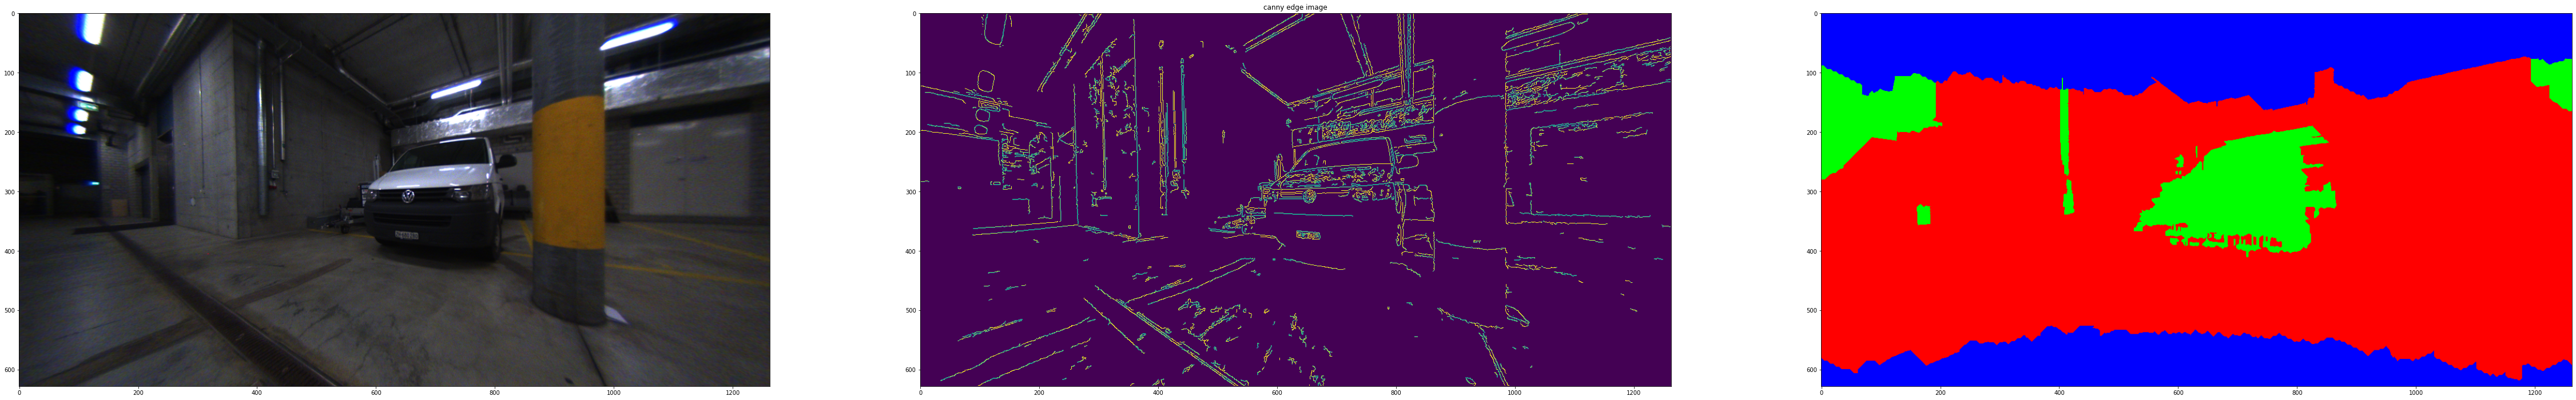

In [61]:
i = 0
file = files_labels[i]
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", useSuperpixel = False, onlyPlotResults = True)

/home/rene/tf_venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


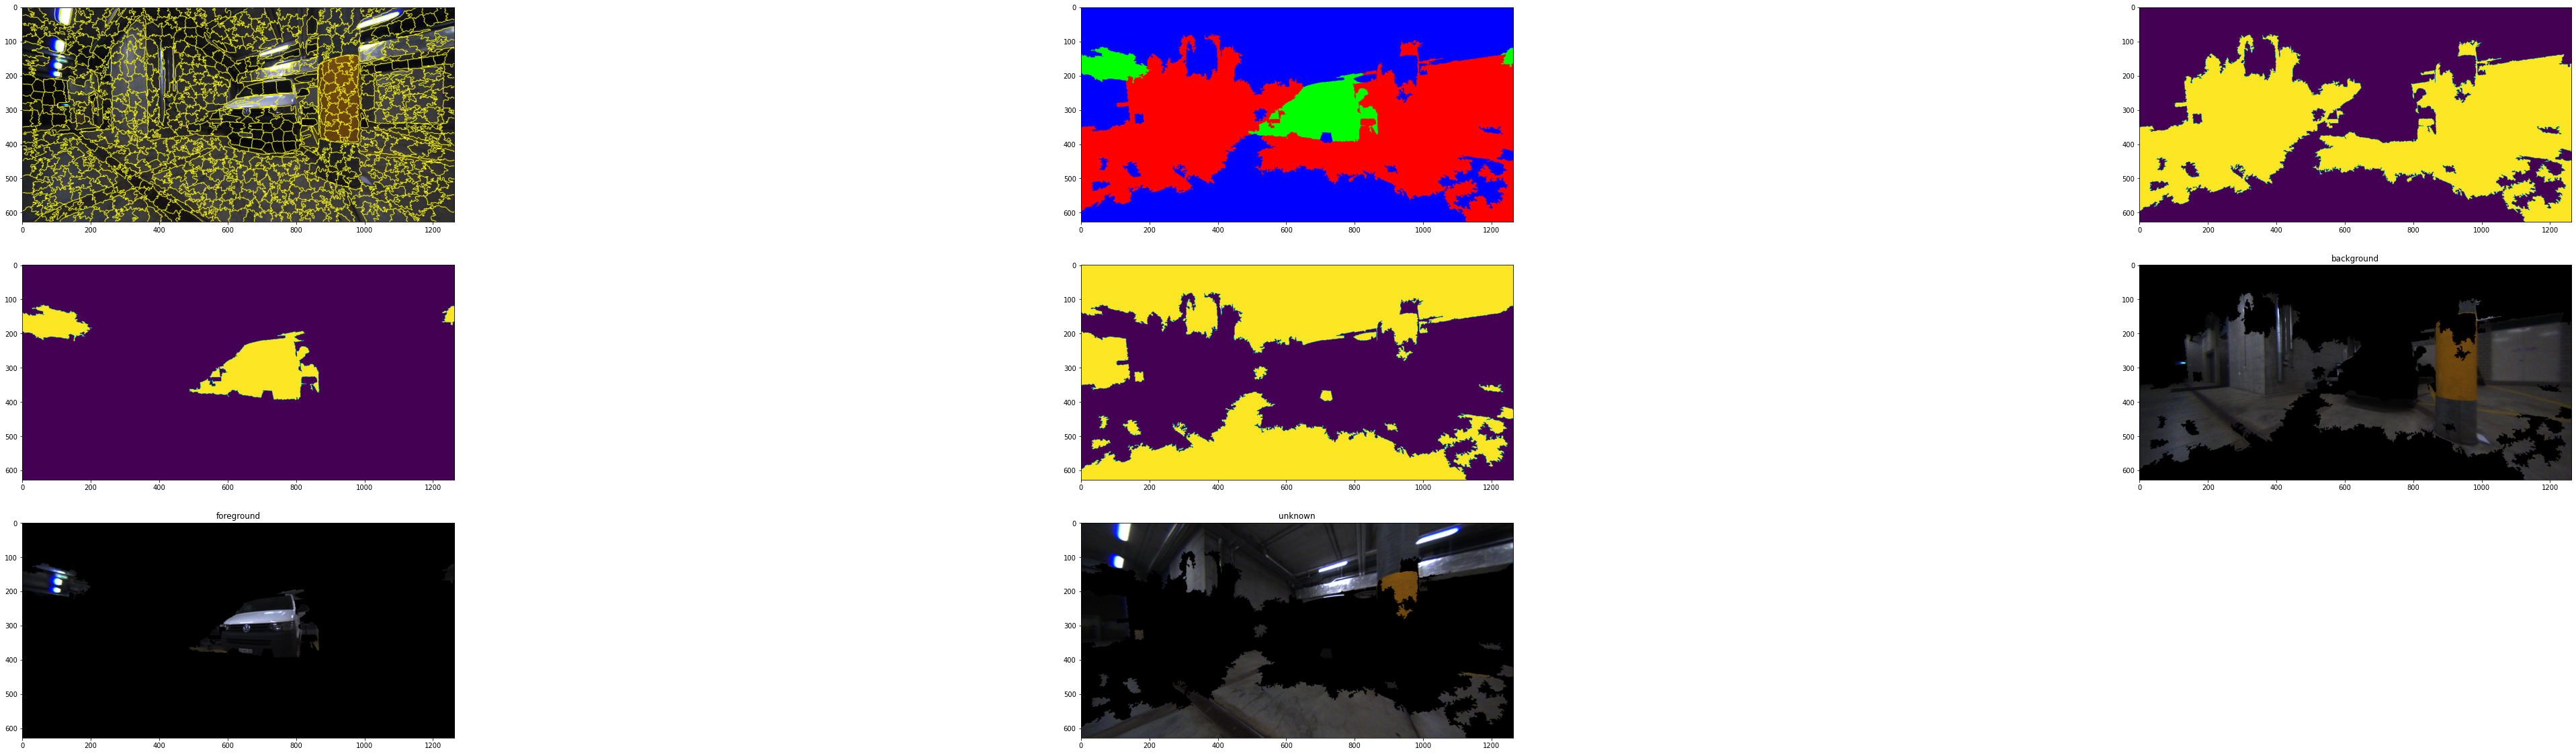

In [62]:
i = 0
file = files_labels[i]
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", useSuperpixel = True, onlyPlotResults = True)